In [ ]:
#Class Two: Intro to Machine Learning and AI 
#Introductory Tutorial on Artificial Neural Networks (Deep Learning) for People Analytics 
#Professor Douglas Guilbeault
#January 2021

#This Tutorial is adapted from: https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
#It is based on image classification because this is a task with well defined training data sets
#E.g. Imagenet and Alexnet

#In practice, when extending to business applications, you are going to need to train your own deep learning 
#method, and as Mitchell explains in "AI: A Guide to Thinking Humans" this can require a lot of computer power
#and trial and error (becoming more of an art than a science). So to give you an intro to the basic mechanics
#of how to run deep learning in Python, we will start with pretrained datasets involving image classification.
#Note: the pre-trained pytorch library I am using in this tutorial contains additional pre-trained datasets
#(e.g. Googlenet) which may in fact apply to a business application of interest. 

#You are encouraged to view the original source for further detail. 
#Note: this is a basic introduction and should be used as a launch pad for those seeking to learn more 
#about how to deep learning for People Analytics. Please write to me if you would like to learn more 
#douglas.guilbeault@haas.berkeley.edu

#This is a useful resource for those looking to learn more: http://neuralnetworksanddeeplearning.com/chap1.html  

In [1]:
#!pip install torchvision==0.4.2
from torchvision import models
import torch
from PIL import Image
from torchvision import transforms
import torchvision.transforms as transforms
import pandas as pd

In [ ]:
#view a list of all the models that exist within pytorch 
#uncomment "dir(models)"
#dir(models)

### Load the pretrained model

In [2]:
alexnet = models.alexnet(pretrained=True)

In [3]:
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
#This is what the above code is doing: 
#Line [1]: Here we are defining a variable transform which is a combination of all 
#          the image transformations to be carried out on the input image.
#Line [2]: Resize the image to 256×256 pixels.
#Line [3]: Crop the image to 224×224 pixels about the center.
#Line [4]: Convert the image to PyTorch Tensor data type.
#Line [5-7]: Normalize the image by setting its mean and standard deviation to the specified values.
    

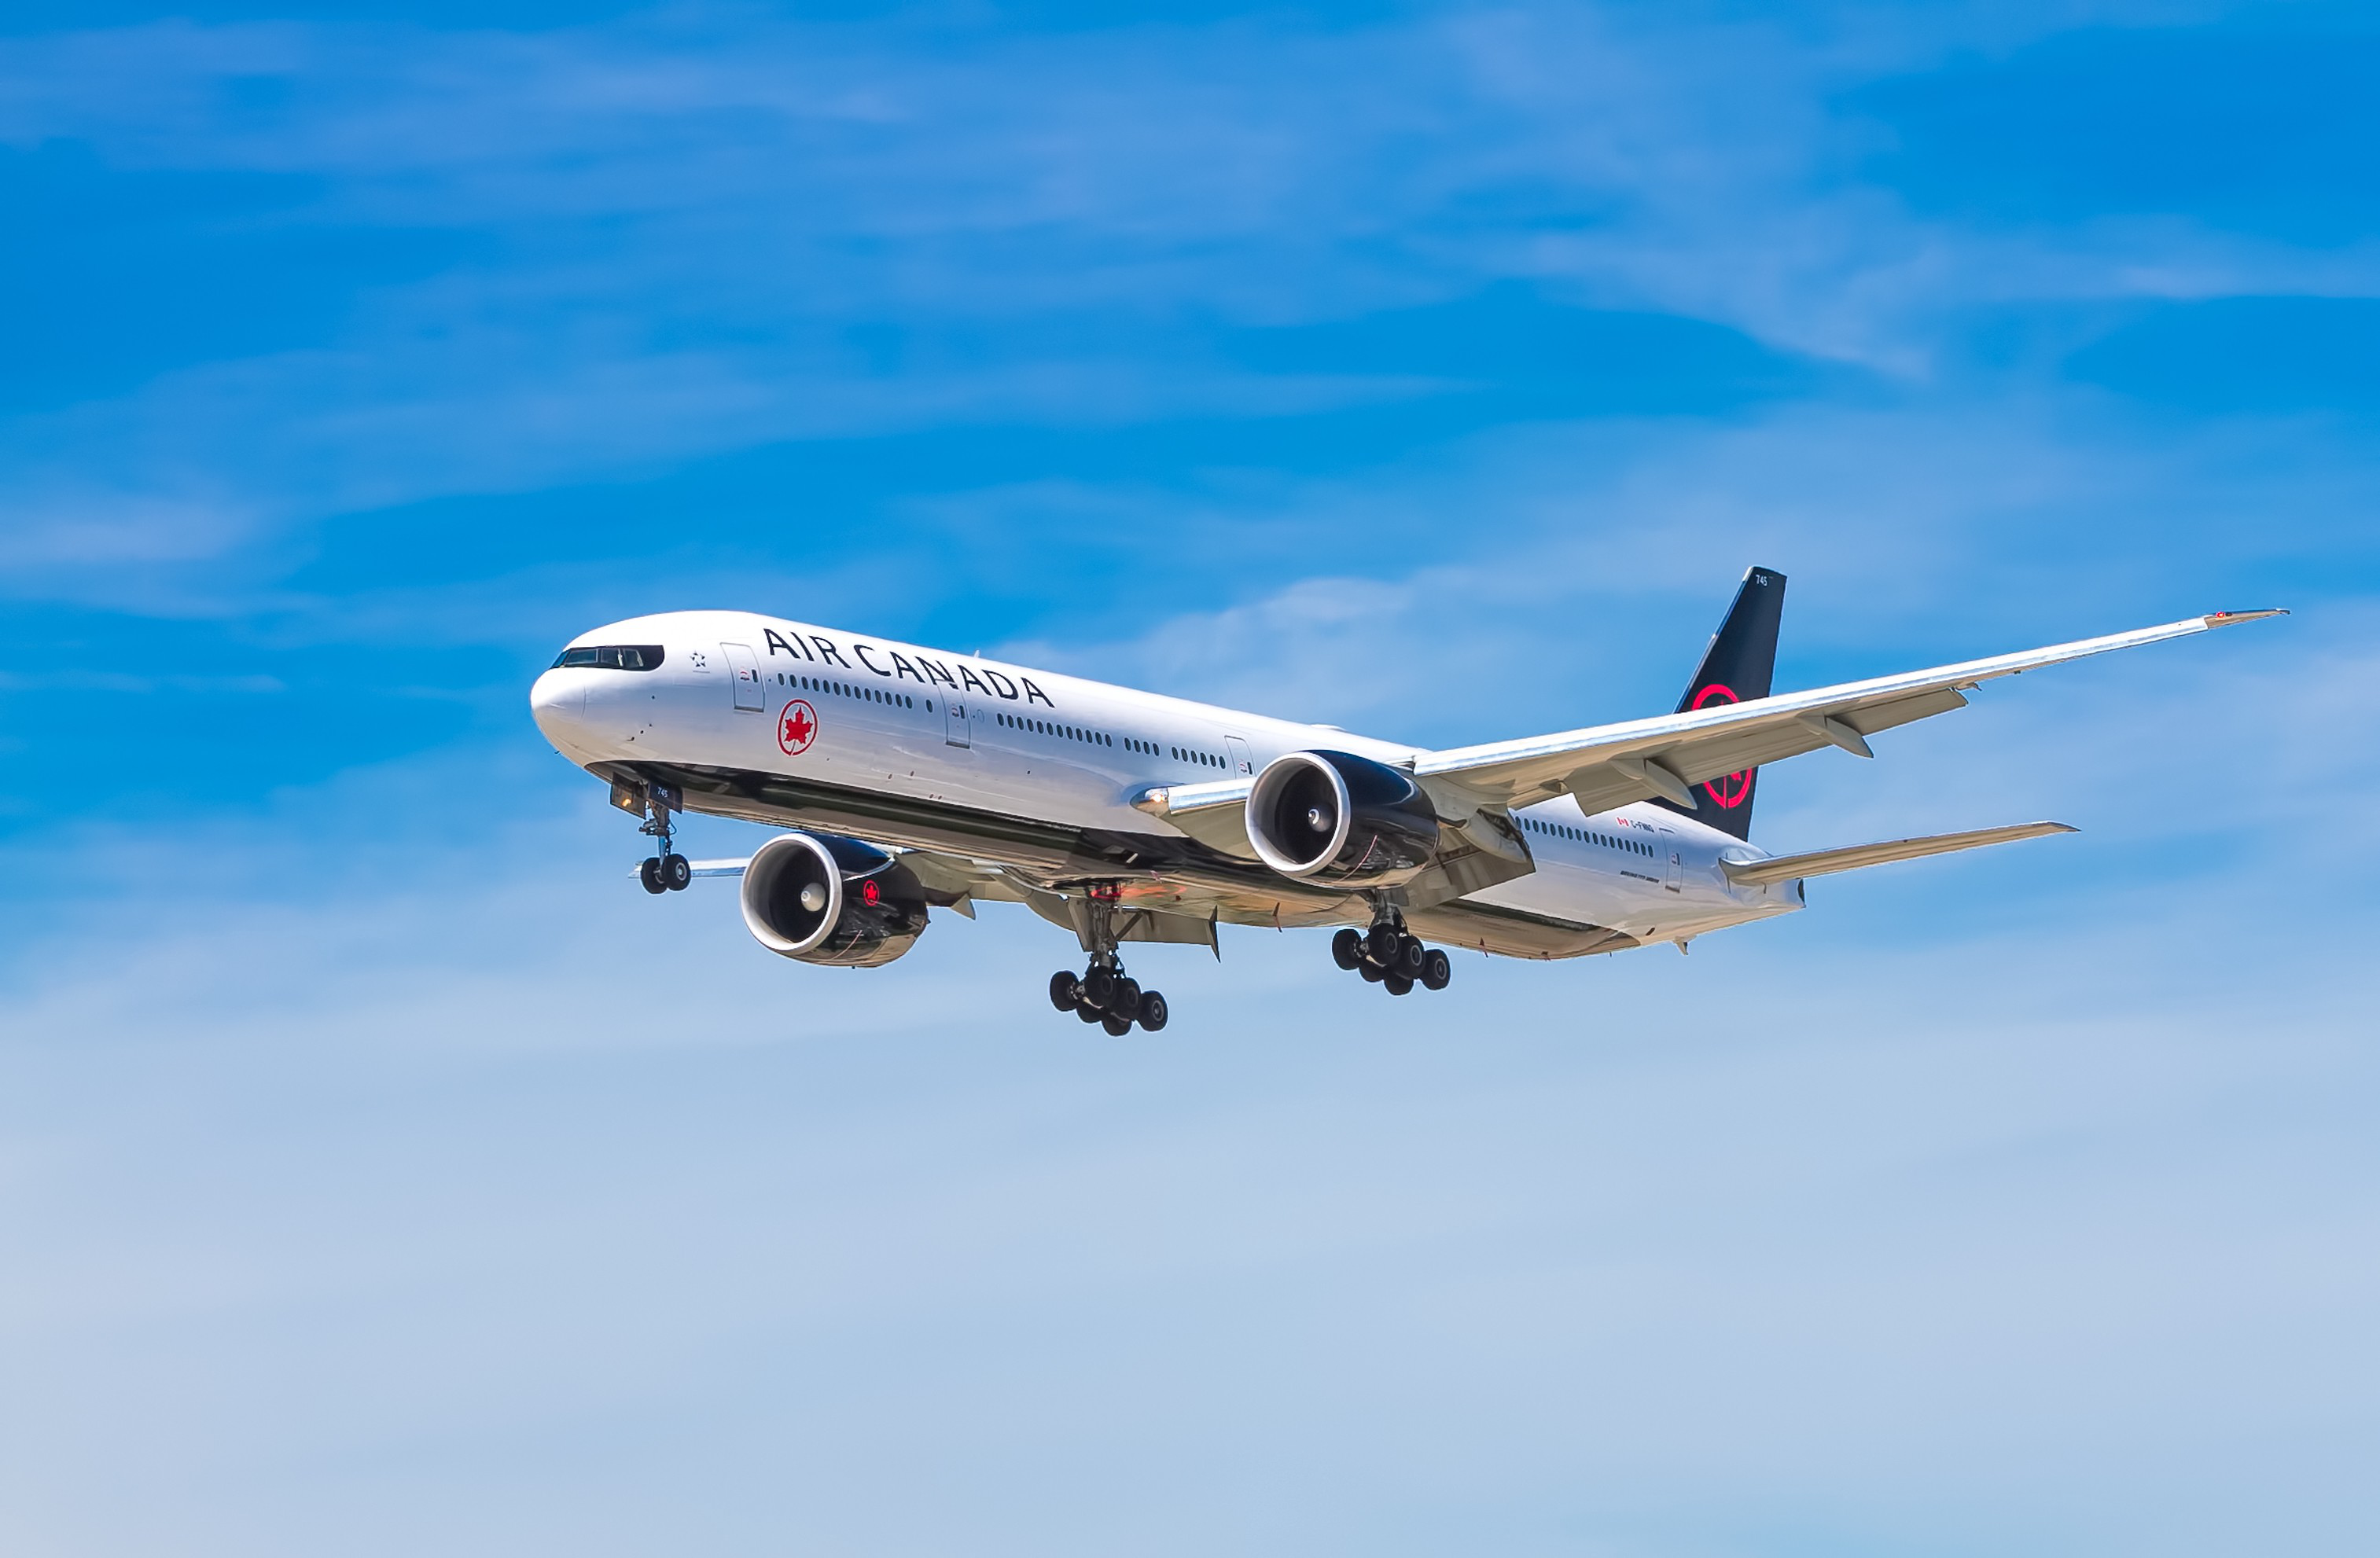

In [57]:
#Put any other jpg image in the same folder as this python notebook
#and make sure you have the filename right; this code will work on any jpg!
#img = Image.open("dog.jpg")
img = Image.open("plane.jpg")
img

In [58]:
img_t = transformations(img)
batch_t = torch.unsqueeze(img_t, 0)

In [59]:
#Put model in evaluation mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [60]:
#Note, the models predictions still are linked to the human labels it was trained on; 
#To get a sense of its predictions, we need to load in the labels and link them to 
#the models predictions; this happens in the next block after this one. 
prediction = alexnet(batch_t)
print(prediction.shape)

torch.Size([1, 1000])


In [61]:
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]
    
#organize class data so it can be mapped effectively
classes = classes[4:len(classes)]
labels = [''.join([i for i in x if not i.isdigit()]) for x in classes]
labels = [x.replace(', ','') for x in labels]

In [62]:
_, index = torch.max(prediction, 1)
percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100

In [63]:
#Let’s see what categories the model thought the image belonged to.
#data has this structure: "category: likelihood of belonging to category"
_, indices = torch.sort(prediction, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('airliner', 95.83795928955078),
 ('wing', 3.545154333114624),
 ('warplane', 0.569564700126648),
 ('missile', 0.022675249725580215),
 ('projectile', 0.01084733847528696)]